In [2]:
!pip install pycocotools

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pycocotools


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [16 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-39\pycocotools
  running build_ext
  cythoning pycocotools/_mask.pyx to pycocotools\_mask.c
  C:\Users\likhi\AppData\Local\Temp\pip-build-env-1txqpby2\overlay\Lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\likhi\AppData\Local\Temp\pip-install-i3w1a6hu\pycocotools_7a82ed51232e483f82742d2e5b27a434\pycocotools\_mask.pyx

In [3]:
import os
import json
import torch
import numpy as np
from tqdm import tqdm
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt




from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from torch.utils.data.sampler import SubsetRandomSampler

## Data Loading and Mask Generation


In [ ]:
root_dir = 'C://Users\likhi\Desktop\Dataset\ResizedDataset'
annotations_dir = '/content/drive/MyDrive/Likhita Project/Annotated files'

In [ ]:
image_list = []
for file_name in os.listdir(root_dir):
    # check if the file has an image extension
    if file_name.lower().endswith('.jpg'):
        # add the file name to the image list
        image_list.append(file_name)

print(image_list)

['IMG_8347.JPG', 'IMG_8351.JPG', 'IMG_8350.JPG', 'IMG_8353.JPG', 'IMG_8352.JPG', 'IMG_8359.JPG', 'IMG_8360.JPG', 'IMG_8365.JPG', 'IMG_8379.JPG', 'IMG_8380.JPG', 'IMG_8381.JPG', 'IMG_8383.JPG', 'IMG_8382.JPG', 'IMG_8388.JPG', 'IMG_8387.JPG', 'IMG_8386.JPG', 'IMG_8389.JPG', 'IMG_8391.JPG', 'IMG_8390.JPG', 'IMG_8399.JPG', 'IMG_8400.JPG', 'IMG_8402.JPG', 'IMG_8403.JPG', 'IMG_8407.JPG', 'IMG_8408.JPG', 'IMG_8411.JPG', 'IMG_8409.JPG', 'IMG_8412.JPG', 'IMG_8424.JPG', 'IMG_8426.JPG', 'IMG_8415.JPG', 'IMG_8416.JPG', 'IMG_8414.JPG', 'IMG_8425.JPG', 'IMG_8432.JPG', 'IMG_8431.JPG', 'IMG_8433.JPG', 'IMG_8428.JPG', 'IMG_8427.JPG', 'IMG_8436.JPG', 'IMG_8437.JPG', 'IMG_8435.JPG', 'IMG_8434.JPG', 'IMG_8438.JPG', 'IMG_8439.JPG', 'IMG_8440.JPG', 'IMG_8283.JPG', 'IMG_8282.JPG', 'IMG_8284.JPG', 'IMG_8285.JPG', 'IMG_8286.JPG', 'IMG_8291.JPG', 'IMG_8287.JPG', 'IMG_8293.JPG', 'IMG_8290.JPG', 'IMG_8294.JPG', 'IMG_8288.JPG', 'IMG_8292.JPG', 'IMG_8337.JPG', 'IMG_8339.JPG', 'IMG_8338.JPG', 'IMG_8302.JPG', 'IMG_83

In [ ]:
ann_list = []
for file_name in os.listdir(annotations_dir):
    # check if the file has an image extension
    if file_name.lower().endswith('.json'):
        # add the file name to the image list
        ann_list.append(file_name)

print(ann_list)

['IMG_8282.json', 'IMG_8283.json', 'IMG_8284.json', 'IMG_8285.json', 'IMG_8286.json', 'IMG_8291.json', 'IMG_8292.json', 'IMG_8294.json', 'IMG_8295.json', 'IMG_8299.json', 'IMG_8293.json', 'IMG_8300.json', 'IMG_8301.json', 'IMG_8302.json', 'IMG_8323.json', 'IMG_8324.json', 'IMG_8336.json', 'IMG_8337.json', 'IMG_8338.json', 'IMG_8339.json', 'IMG_8340.json', 'IMG_8341.json', 'IMG_8342.json', 'IMG_8343.json', 'IMG_8344.json', 'IMG_8345.json', 'IMG_8348.json', 'IMG_8349.json', 'IMG_8350.json', 'IMG_8351.json', 'IMG_8352.json', 'IMG_8353.json', 'IMG_8354.json', 'IMG_8356.json', 'IMG_8357.json', 'IMG_8358.json', 'IMG_8359.json', 'IMG_8360.json', 'IMG_8361.json', 'IMG_8362.json', 'IMG_8363.json', 'IMG_8364.json', 'IMG_8365.json', 'IMG_8368.json', 'IMG_8369.json', 'IMG_8370.json', 'IMG_8371.json', 'IMG_8372.json', 'IMG_8373.json', 'IMG_8374.json', 'IMG_8375.json', 'IMG_8376.json', 'IMG_8377.json', 'IMG_8378.json', 'IMG_8379.json', 'IMG_8380.json', 'IMG_8381.json', 'IMG_8382.json', 'IMG_8383.jso

In [ ]:
# extract the image_id values from the file names
image_ids_jpg = [name.split('.')[0] for name in image_list]
image_ids_json = [name.split('.')[0] for name in ann_list]

# take the intersection of the image_id values
common_image_ids = list(set(image_ids_jpg) & set(image_ids_json))

print(common_image_ids)
print(len(common_image_ids))


common_image = [id+'.JPG' for id in common_image_ids]
print(common_image)
print(len(common_image))

['IMG_8377', 'IMG_8397', 'IMG_8382', 'IMG_8413', 'IMG_8424', 'IMG_8411', 'IMG_8416', 'IMG_8389', 'IMG_8383', 'IMG_8282', 'IMG_8285', 'IMG_8344', 'IMG_8361', 'IMG_8438', 'IMG_8401', 'IMG_8354', 'IMG_8340', 'IMG_8403', 'IMG_8381', 'IMG_8341', 'IMG_8414', 'IMG_8284', 'IMG_8350', 'IMG_8399', 'IMG_8412', 'IMG_8352', 'IMG_8378', 'IMG_8408', 'IMG_8437', 'IMG_8394', 'IMG_8342', 'IMG_8360', 'IMG_8402', 'IMG_8391', 'IMG_8393', 'IMG_8373', 'IMG_8359', 'IMG_8324', 'IMG_8363', 'IMG_8374', 'IMG_8291', 'IMG_8426', 'IMG_8369', 'IMG_8323', 'IMG_8337', 'IMG_8353', 'IMG_8286', 'IMG_8364', 'IMG_8372', 'IMG_8386', 'IMG_8292', 'IMG_8283', 'IMG_8398', 'IMG_8336', 'IMG_8376', 'IMG_8431', 'IMG_8345', 'IMG_8347', 'IMG_8370', 'IMG_8406', 'IMG_8299', 'IMG_8396', 'IMG_8343', 'IMG_8395', 'IMG_8440', 'IMG_8338', 'IMG_8365', 'IMG_8380', 'IMG_8385', 'IMG_8388', 'IMG_8427', 'IMG_8294', 'IMG_8439', 'IMG_8357', 'IMG_8387', 'IMG_8351', 'IMG_8400', 'IMG_8405', 'IMG_8348', 'IMG_8432', 'IMG_8410', 'IMG_8302', 'IMG_8407', 'IM

In [ ]:
polygon_shapes = {}
target_labels = {}
masked_images = {}

In [ ]:
# Loop through all files in the folder
for filename in os.listdir(annotations_dir):
      # Open the file and load the JSON data
      with open(os.path.join(annotations_dir, filename), 'r') as f:
          data = json.load(f)
          #print(data)
          w,h = data['imageWidth'], data['imageHeight']
          shapes = data['shapes'][0]['points']
          
          shapes = [tuple(x) for x in shapes]

          label = data['shapes'][0]['label']
          
          image = Image.new('RGB',(w,h), color=(0, 0, 0))
          # create a draw object for the image
          draw = ImageDraw.Draw(image)

          # draw the polygon on the blank image
          draw.polygon(shapes, fill=(255, 255, 255))

          # create a binary mask from the polygon by converting the image to grayscale
          gray = image.convert('L')
          mask = Image.eval(gray, lambda x: 255 if x > 0 else 0)

          # apply the mask to the original image to get the masked image
          masked_image = Image.composite(image, Image.new('RGB', image.size, (0, 0, 0)), mask)

          f = filename.split('.')[0] + '.JPG'

          target_labels[f] = label
          masked_images[f] = masked_image

In [ ]:
print(len(masked_images))
print(len(target_labels))

132
132


In [ ]:
ms = masked_images['IMG_8432.JPG']
ms = ms.convert('L')
# Convert the mask to a binary image
binary_mask = ms.point(lambda x: 1 if x > 0 else 0, '1')

# Find the coordinates of the foreground pixels
coords = binary_mask.getbbox()

# Construct the bounding box rectangle
bbox = coords

print(bbox)

(0, 153, 1024, 895)


In [ ]:
bboxes = {}
for name in common_image:
  ms = masked_images[name]
  ms = ms.convert('L')
  # Convert the mask to a binary image
  binary_mask = ms.point(lambda x: 1 if x > 0 else 0, '1')

  # Find the coordinates of the foreground pixels
  coords = binary_mask.getbbox()

  # Construct the bounding box rectangle
  xmin,ymin,xmax,ymax = coords
  bboxes[name] = [xmin,ymin,xmax,ymax]


print(len(bboxes))
print(bboxes)

106
{'IMG_8377.JPG': [253, 90, 571, 1024], 'IMG_8397.JPG': [301, 186, 703, 1024], 'IMG_8382.JPG': [5, 183, 1021, 660], 'IMG_8413.JPG': [0, 181, 898, 775], 'IMG_8424.JPG': [0, 43, 1024, 710], 'IMG_8411.JPG': [0, 303, 959, 1011], 'IMG_8416.JPG': [4, 184, 973, 878], 'IMG_8389.JPG': [181, 420, 1024, 750], 'IMG_8383.JPG': [227, 386, 1023, 676], 'IMG_8282.JPG': [2, 361, 781, 911], 'IMG_8285.JPG': [38, 204, 959, 764], 'IMG_8344.JPG': [0, 301, 1024, 922], 'IMG_8361.JPG': [0, 281, 869, 916], 'IMG_8438.JPG': [0, 172, 1024, 942], 'IMG_8401.JPG': [34, 286, 1011, 897], 'IMG_8354.JPG': [330, 17, 772, 993], 'IMG_8340.JPG': [170, 0, 868, 1022], 'IMG_8403.JPG': [81, 432, 1023, 686], 'IMG_8381.JPG': [137, 384, 1024, 655], 'IMG_8341.JPG': [0, 173, 1024, 847], 'IMG_8414.JPG': [2, 146, 1024, 1024], 'IMG_8284.JPG': [1, 376, 984, 856], 'IMG_8350.JPG': [0, 306, 1024, 1018], 'IMG_8399.JPG': [0, 275, 1024, 1003], 'IMG_8412.JPG': [0, 160, 1024, 1020], 'IMG_8352.JPG': [0, 291, 1024, 1019], 'IMG_8378.JPG': [386, 2

In [ ]:
type(masked_images['IMG_8432.JPG'])

PIL.Image.Image

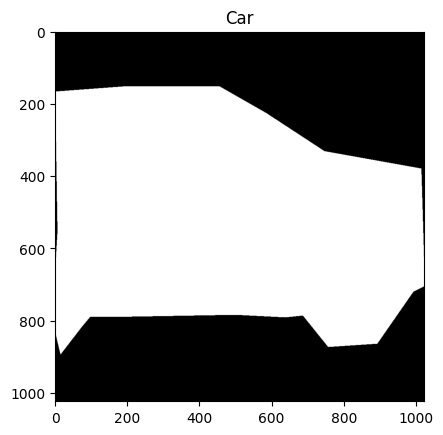

In [ ]:
plt.title(target_labels['IMG_8432.JPG'])
plt.imshow(masked_images['IMG_8432.JPG'])

##DataLoader

In [ ]:
n_classes = 2
BATCH_SIZE = 2
TRAIN_SPLIT = 0.75
VAL_SPLIT = 0.125

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [ ]:
len(list(os.listdir(root_dir)))

112

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self, root, img_names, masks, labels, bboxes, transforms):
    self.root = root
    self.masks = masks
    self.labels = labels
    self.bboxes = bboxes
    self.transforms = transforms
    self.imgs = img_names
    # self.imgs = list(os.listdir(root))
    self.img_names = img_names
    # print(self.imgs)
  
  def __getitem__(self,idx):
    img_path = os.path.join(self.root,self.img_names[idx])

    img = Image.open(img_path).convert("RGB")
    name = self.img_names[idx]
    mask = self.masks[name].convert("RGB")
    #plt.imshow(mask)
    rboxes = [self.bboxes[name]]
    # ms = mask
    # ms = ms.convert('L')

    if self.transforms:
      img = self.transforms(img)
      mask = self.transforms(mask)    

    label = self.labels[name]
    classes = [1] if label == 'Car' else [0]
    
    #rboxes = torch.as_tensor(rboxes, dtype=torch.float32)
    #mask = torch.as_tensor(mask, dtype=torch.uint8)


    target = {
            'boxes': torch.as_tensor(rboxes, dtype=torch.float32),
            'labels': torch.as_tensor(classes, dtype=torch.int64),
            'masks': mask
            }
    return img, target

  def __len__(self):
    return len(self.imgs)



In [ ]:
custom_data = CustomDataset(root=root_dir,img_names=common_image, masks=masked_images,labels=target_labels,bboxes=bboxes, transforms=transform)

indices = list(range(len(custom_data)))
s1 = int(np.floor(TRAIN_SPLIT * len(custom_data)))
s2 = int((len(custom_data) - s1)/2)

# s2 = int(np.floor(VAL_SPLIT*len(custom_data)))

train_indx = indices[:s1]
val_indx = indices[s1:s1+s2]
test_index = indices[s1+s2:]

train_sampler = SubsetRandomSampler(train_indx)
val_sampler = SubsetRandomSampler(val_indx)
test_sampler = SubsetRandomSampler(test_index)

train_data = DataLoader(custom_data, batch_size = BATCH_SIZE, sampler=train_sampler, shuffle=False,collate_fn=lambda x:list(zip(*x)))
val_data = DataLoader(custom_data, batch_size = BATCH_SIZE, sampler=val_sampler, shuffle=False,collate_fn=lambda x:list(zip(*x)))
test_data = DataLoader(custom_data, batch_size = BATCH_SIZE, sampler=test_sampler, shuffle=False,collate_fn=lambda x:list(zip(*x)))

In [ ]:
print(train_indx)
print(val_indx)
print(test_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
[79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]
[92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]


## Visulaisations

In [ ]:
print(len(custom_data))
print(len(train_data))
print(len(val_data))
print(len(test_data))


106
40
7
7


In [ ]:
for i,(img, tgt) in enumerate(train_data):
  print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [ ]:
t_i = []
t_m = []
t_l = []
for i, (imgs, targets) in enumerate(train_data):
    t = transforms.ToPILImage()
    img = t(imgs[0])
    msk = t(targets[0]['masks'])
    #plt.imshow(msk)
    t_i.append(img)
    t_m.append(msk)
    t_l.append(targets[0]['labels'])

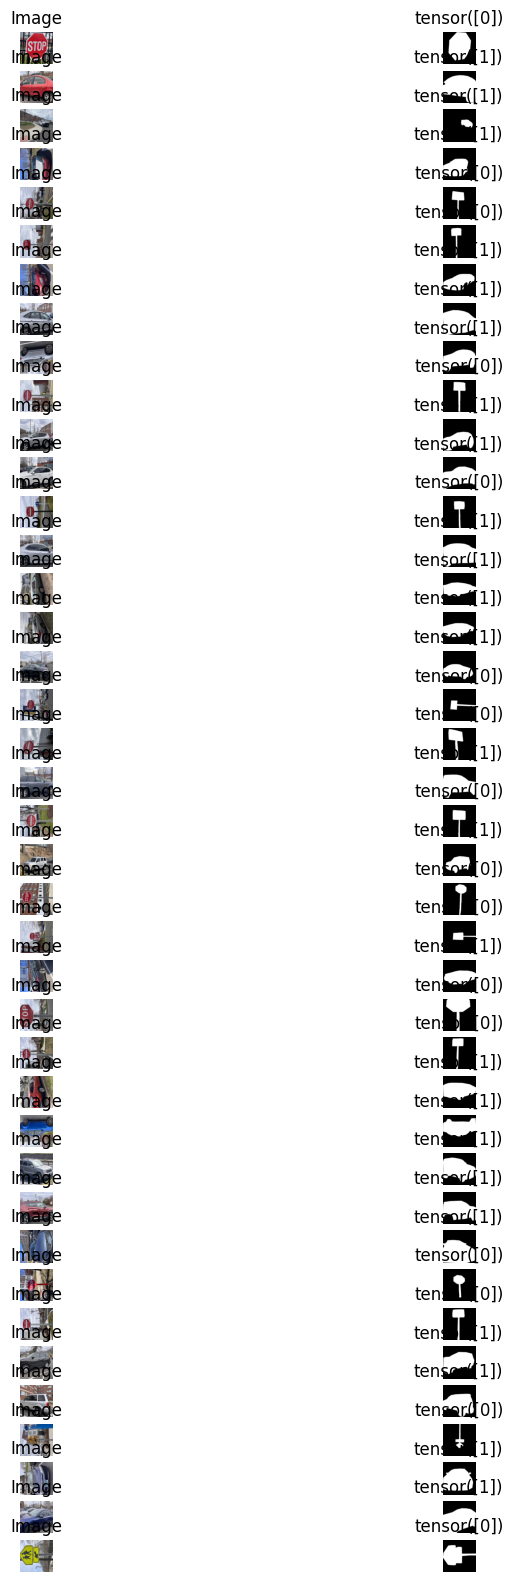

In [ ]:
import matplotlib.pyplot as plt

# assuming you have two lists: images and masks
num_images = len(t_i)

fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=(10, 20))

for i in range(num_images):
    # display the image in the left subplot
    axes[i, 0].imshow(t_i[i])
    axes[i, 0].set_title('Image')
    axes[i, 0].axis('off')
    
    # display the mask in the right subplot
    axes[i, 1].imshow(t_m[i])
    axes[i, 1].set_title(f'{t_l[i]}')
    axes[i, 1].axis('off')

plt.show()


## Model Training


In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

# torch.cuda.set_device(1)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 64
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

    model = model.to(device)

    return model


In [ ]:
model = get_model_instance_segmentation(n_classes)

In [ ]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.00001, momentum=0.9, weight_decay=0.0005)

In [ ]:
from tqdm.notebook import tqdm
# Perform training loop for n epochs
loss_list = []
n_epochs = 50
model.train()
for epoch in tqdm(range(n_epochs)):
    loss_epoch = []
    iteration=1
    for images,targets in tqdm(train_data):

        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        optimizer.zero_grad()
        model=model.float()
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        losses.backward()       
        optimizer.step()
        # print('loss:', losses.item())
        # loss_epoch.append(losses.item())
        loss_epoch.append(losses.item())
        
        # # Plot loss every 10th iteration
        # plt.plot(list(range(iteration)), loss_epoch)
        # plt.xlabel("Iteration")
        # plt.ylabel("Loss")
        # plt.show()
        # iteration+=1
    #torch.cuda.empty_cache()
    loss_epoch_mean = np.mean(loss_epoch) 
    loss_list.append(loss_epoch_mean)
    print(f"The mean loss for {epoch}th epoch: {loss_epoch_mean}") 
    # loss_list.append(loss_epoch_mean)    
    print("Average loss for epoch = {:.4f} ".format(loss_epoch_mean))



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 0th epoch: 147.6139958322048
Average loss for epoch = 147.6140 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 1th epoch: 140.08102030754088
Average loss for epoch = 140.0810 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 2th epoch: 138.04546311199664
Average loss for epoch = 138.0455 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 3th epoch: 136.39950799942017
Average loss for epoch = 136.3995 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 4th epoch: 138.09499217867852
Average loss for epoch = 138.0950 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 5th epoch: 136.5343611359596
Average loss for epoch = 136.5344 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 6th epoch: 136.68235650062562
Average loss for epoch = 136.6824 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 7th epoch: 137.53790311813356
Average loss for epoch = 137.5379 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 8th epoch: 130.20825587511064
Average loss for epoch = 130.2083 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 9th epoch: 118.92181845903397
Average loss for epoch = 118.9218 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 10th epoch: 43.7851003408432
Average loss for epoch = 43.7851 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 11th epoch: 33.18503043651581
Average loss for epoch = 33.1850 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 12th epoch: 22.161462330818175
Average loss for epoch = 22.1615 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 13th epoch: 24.246901679039002
Average loss for epoch = 24.2469 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 14th epoch: 24.006857872009277
Average loss for epoch = 24.0069 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 15th epoch: 19.062603908777238
Average loss for epoch = 19.0626 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 16th epoch: 18.766799622774123
Average loss for epoch = 18.7668 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 17th epoch: 22.230938065052033
Average loss for epoch = 22.2309 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 18th epoch: 18.505846482515334
Average loss for epoch = 18.5058 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 19th epoch: 21.172968208789825
Average loss for epoch = 21.1730 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 20th epoch: 22.215718924999237
Average loss for epoch = 22.2157 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 21th epoch: 19.985211992263793
Average loss for epoch = 19.9852 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 22th epoch: 19.903597033023836
Average loss for epoch = 19.9036 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 23th epoch: 17.63972673416138
Average loss for epoch = 17.6397 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 24th epoch: 19.117508590221405
Average loss for epoch = 19.1175 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 25th epoch: 18.421916860342026
Average loss for epoch = 18.4219 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 26th epoch: 18.87980047464371
Average loss for epoch = 18.8798 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 27th epoch: 17.3362885504961
Average loss for epoch = 17.3363 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 28th epoch: 17.433968688547612
Average loss for epoch = 17.4340 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 29th epoch: 18.328609895706176
Average loss for epoch = 18.3286 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 30th epoch: 18.30648218393326
Average loss for epoch = 18.3065 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 31th epoch: 19.277769380807875
Average loss for epoch = 19.2778 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 32th epoch: 17.623856426775454
Average loss for epoch = 17.6239 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 33th epoch: 17.944649612903596
Average loss for epoch = 17.9446 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 34th epoch: 18.88133659362793
Average loss for epoch = 18.8813 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 35th epoch: 17.19646938443184
Average loss for epoch = 17.1965 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 36th epoch: 17.873246490955353
Average loss for epoch = 17.8732 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 37th epoch: 17.681867212057114
Average loss for epoch = 17.6819 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 38th epoch: 16.040326714515686
Average loss for epoch = 16.0403 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 39th epoch: 17.255080753564833
Average loss for epoch = 17.2551 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 40th epoch: 17.07864589691162
Average loss for epoch = 17.0786 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 41th epoch: 18.425392326712608
Average loss for epoch = 18.4254 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 42th epoch: 17.025669836997984
Average loss for epoch = 17.0257 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 43th epoch: 16.60007590353489
Average loss for epoch = 16.6001 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 44th epoch: 16.363807475566865
Average loss for epoch = 16.3638 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 45th epoch: 16.2449312210083
Average loss for epoch = 16.2449 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 46th epoch: 17.664201897382735
Average loss for epoch = 17.6642 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 47th epoch: 16.830588966608047
Average loss for epoch = 16.8306 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 48th epoch: 16.273164522647857
Average loss for epoch = 16.2732 


  0%|          | 0/40 [00:00<?, ?it/s]

The mean loss for 49th epoch: 15.862092563509941
Average loss for epoch = 15.8621 


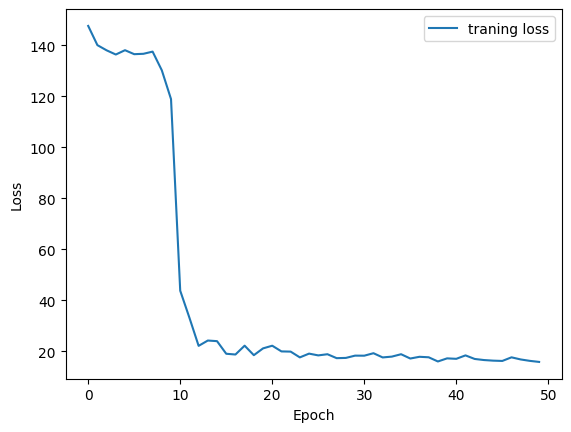

In [ ]:
# Plot training loss
plt.plot(list(range(n_epochs)), loss_list, label='traning loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
# model_dir = '/content/drive/MyDrive/Likhita Project/Models'
# model_path = os.path.join(model_dir, "model"+".pth")
# torch.save(model.state_dict(), model_path)

In [ ]:
# model_scripted = torch.jit.script(model) # Export to TorchScript
# model_scripted.save('model_scripted.pt') # Save

In [ ]:
# model = torch.jit.load('model_scripted.pt')
# model.eval()

## Evaluate

In [ ]:
model_output = []

In [ ]:
for i, (imss, trgtss) in enumerate(test_data): 
  images = list(image.to(device) for image in imss)
  targets = [{k: v.to(device) for k, v in t.items()} for t in trgtss]

  model=model.float()
  model.eval()
  output = model(images)

  print(f"Batch: {i} completed!")
  model_output.append(output)

Batch: 0 completed!
Batch: 1 completed!
Batch: 2 completed!
Batch: 3 completed!
Batch: 4 completed!
Batch: 5 completed!
Batch: 6 completed!


In [ ]:
# imss, trgtss=next(iter(test_data))
# images = list(image.to(device) for image in imss)
# targets = [{k: v.to(device) for k, v in t.items()} for t in trgtss]

# model=model.float()
# model.eval()
# output = model(images)

# # with torch.no_grad():
# #     view(images, output, 2)

In [ ]:
o_i = []
for i, (img,trt) in enumerate(test_data):
  for j in range(BATCH_SIZE):
    o_i.append(img[j])

In [ ]:
len(o_i)

14

In [ ]:
print(model_output)

[[{'boxes': tensor([], device='cuda:0', size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0', grad_fn=<IndexBackward0>), 'masks': tensor([], device='cuda:0', size=(0, 1, 128, 128))}, {'boxes': tensor([[ 11.7772, 127.8960, 128.0000, 127.9926]], device='cuda:0',
       grad_fn=<StackBackward0>), 'labels': tensor([1], device='cuda:0'), 'scores': tensor([0.1475], device='cuda:0', grad_fn=<IndexBackward0>), 'masks': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0708, 0.0764, 0.0627]]]],
       device='cuda:0', grad_fn=<UnsqueezeBackward0>)}], [{'boxes': tensor([], device='cu

In [ ]:
len(model_output)

2